Model run and Figure generation for the Unbalanced Modes Model.

Fast enough to be run locally, but can also be (and has been) run on an HPC with more workers.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pyabc
import time
import os
import tempfile

%matplotlib inline

db_path = ("sqlite:///" + os.path.join("/home/felipe/testresults", "UnbMLA.db"))

db_path_ori = ("sqlite:///" + os.path.join("/home/felipe/testresults", "UnbMDYN.db"))


In [2]:
#some global variables

eps_list=[5, 3, 2, 1, 0.75, 0.5, 0.33, 0.25, 0.2, 0.15]
#eps = pyabc.ListEpsilon(eps_list)
max_nr_pop=10
eps=pyabc.MedianEpsilon(500, median_multiplier=0.9)
min_eps=0.02
pop_size = 16
noise_factor=0.025
iters=100
sleeptime=0.25
noisefactor = 0.4


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

Model definition

In [3]:
def model(pars):
    theta = pars['theta1']
    sol = theta**2 + 0.4 * np.random.randn()
    
    # Mimic a model with long runtimes for some parameters
    if theta < 0:
        time.sleep(sleeptime)
            
    return {"X_2": sol}

parameter_prior = pyabc.Distribution(theta1=pyabc.RV("uniform", -2, 4))

def distance(simulation, data):
    return abs(data["X_2"] - simulation["X_2"])


Inference using LA scheduling (100 times)

In [10]:
redis_sampler = pyabc.sampler.RedisEvalParallelSampler(host="localhost", port=6379, look_ahead = True,
                                                       look_ahead_delay_evaluation=True)

abc = pyabc.ABCSMC(models=model,
        parameter_priors=parameter_prior,
        distance_function=distance,
        population_size=pop_size,
        sampler=redis_sampler,
        eps=eps)

histories=[]
runtimes=np.zeros(iters)
for i in range(iters):
    starttime=time.time()
    abc.new(db_path, {"X_2": 1});
    endtime=time.time()
    h = abc.run(minimum_epsilon=min_eps, max_nr_populations=max_nr_pop)
    histories.append(h)
    runtimes[i]=endtime-starttime

INFO:History:Start <ABCSMC id=101, start_time=2021-04-27 17:36:46.851816>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.9813967573732012.
INFO:ABC:Acceptance rate: 16 / 39 = 4.1026e-01, ESS=1.5352e+01.
INFO:ABC:t: 2, eps: 0.46644667974946663.
INFO:ABC:Acceptance rate: 16 / 64 = 2.5000e-01, ESS=1.5745e+01.
INFO:ABC:t: 3, eps: 0.2704893813912247.
INFO:ABC:Acceptance rate: 16 / 72 = 2.2222e-01, ESS=1.5704e+01.
INFO:ABC:t: 4, eps: 0.1566621611773189.
INFO:ABC:Acceptance rate: 16 / 230 = 6.9565e-02, ESS=1.5918e+01.
INFO:ABC:t: 5, eps: 0.09835117383015692.
INFO:ABC:Acceptance rate: 16 / 224 = 7.1429e-02, ESS=1.5349e+01.
INFO:ABC:t: 6, eps: 0.04879034813072909.
INFO:ABC:Acceptance rate: 16 / 416 = 3.8462e-02, ESS=1.5856e+01.
INFO:ABC:t: 7, eps: 0.018688746321124224.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:ABC:Acceptance rate: 16 / 1107 = 1.4453e-02, ESS=1.5960e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:

INFO:History:Start <ABCSMC id=109, start_time=2021-04-27 17:43:32.658998>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 22 = 7.2727e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.7935032089828052.
INFO:ABC:Acceptance rate: 16 / 36 = 4.4444e-01, ESS=1.5866e+01.
INFO:ABC:t: 2, eps: 0.3587111155980084.
INFO:ABC:Acceptance rate: 16 / 70 = 2.2857e-01, ESS=1.5651e+01.
INFO:ABC:t: 3, eps: 0.13444032692575683.
INFO:ABC:Acceptance rate: 16 / 263 = 6.0837e-02, ESS=1.5852e+01.
INFO:ABC:t: 4, eps: 0.05890311056208587.
INFO:ABC:Acceptance rate: 16 / 384 = 4.1667e-02, ESS=1.5784e+01.
INFO:ABC:t: 5, eps: 0.026783330315861595.
INFO:ABC:Acceptance rate: 16 / 577 = 2.7730e-02, ESS=1.5906e+01.
INFO:ABC:t: 6, eps: 0.013789011556847619.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:ABC:Acceptance rate: 16 / 1264 = 1.2658e-02, ESS=1.5715e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=109, duration=0:00:39.272554, end_time=2021-04-27 17:44:11.931552>
INFO:History:Start <

INFO:ABC:t: 2, eps: 0.22494694819415695.
INFO:ABC:Acceptance rate: 16 / 115 = 1.3913e-01, ESS=1.5380e+01.
INFO:ABC:t: 3, eps: 0.07772662479819561.
INFO:ABC:Acceptance rate: 16 / 265 = 6.0377e-02, ESS=1.5863e+01.
INFO:ABC:t: 4, eps: 0.03486015113773659.
INFO:ABC:Acceptance rate: 16 / 613 = 2.6101e-02, ESS=1.5744e+01.
INFO:ABC:t: 5, eps: 0.01362268191682973.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:ABC:Acceptance rate: 16 / 1631 = 9.8099e-03, ESS=1.4505e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=117, duration=0:00:36.051989, end_time=2021-04-27 17:50:56.776897>
INFO:History:Start <ABCSMC id=118, start_time=2021-04-27 17:50:56.805251>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.8629813829873574.
INFO:ABC:Acceptance rate: 16 / 31 = 5.1613e-01, ESS=1.5486e+01.
INFO:ABC:t: 2, eps: 0.4997141522471071.
INFO:ABC:Acceptance rate: 16 / 46 = 3.4783e-01, ESS=9.5654e+00.
INFO:ABC:t: 3, eps: 0.

INFO:History:Start <ABCSMC id=126, start_time=2021-04-27 17:54:36.194508>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.9556106189877449.
INFO:ABC:Acceptance rate: 16 / 34 = 4.7059e-01, ESS=1.5985e+01.
INFO:ABC:t: 2, eps: 0.17803021247235387.
INFO:ABC:Acceptance rate: 16 / 104 = 1.5385e-01, ESS=1.4617e+01.
INFO:ABC:t: 3, eps: 0.11959572013014794.
INFO:ABC:Acceptance rate: 16 / 253 = 6.3241e-02, ESS=1.4376e+01.
INFO:ABC:t: 4, eps: 0.0429030621156782.
INFO:ABC:Acceptance rate: 16 / 898 = 1.7817e-02, ESS=1.3774e+01.
INFO:ABC:t: 5, eps: 0.01729488800700063.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:ABC:Acceptance rate: 16 / 1119 = 1.4298e-02, ESS=1.5942e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=126, duration=0:00:36.195312, end_time=2021-04-27 17:55:12.389820>
INFO:History:Start <ABCSMC id=127, start_time=2021-04-27 17:55:12.409509>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16

INFO:ABC:t: 4, eps: 0.04352755830935331.
INFO:ABC:Acceptance rate: 16 / 537 = 2.9795e-02, ESS=1.5514e+01.
INFO:ABC:t: 5, eps: 0.026314176640239127.
INFO:ABC:Acceptance rate: 16 / 825 = 1.9394e-02, ESS=1.2882e+01.
INFO:ABC:t: 6, eps: 0.010300433286040711.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:ABC:Acceptance rate: 16 / 2625 = 6.0952e-03, ESS=1.4660e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=134, duration=0:00:57.319745, end_time=2021-04-27 18:38:58.781609>
INFO:History:Start <ABCSMC id=135, start_time=2021-04-27 18:38:58.802485>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.7354131228957954.
INFO:ABC:Acceptance rate: 16 / 31 = 5.1613e-01, ESS=1.5877e+01.
INFO:ABC:t: 2, eps: 0.34230944237228766.
INFO:ABC:Acceptance rate: 16 / 89 = 1.7978e-01, ESS=1.4352e+01.
INFO:ABC:t: 3, eps: 0.09394658707157433.
INFO:ABC:Acceptance rate: 16 / 353 = 4.5326e-02, ESS=1.5670e+01.
INFO:ABC:t: 4, eps:

INFO:History:Start <ABCSMC id=143, start_time=2021-04-27 18:47:26.490183>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 1.008000313757347.
INFO:ABC:Acceptance rate: 16 / 34 = 4.7059e-01, ESS=1.5756e+01.
INFO:ABC:t: 2, eps: 0.40468356125350224.
INFO:ABC:Acceptance rate: 16 / 69 = 2.3188e-01, ESS=1.5860e+01.
INFO:ABC:t: 3, eps: 0.12382856393133325.
INFO:ABC:Acceptance rate: 16 / 185 = 8.6486e-02, ESS=1.5824e+01.
INFO:ABC:t: 4, eps: 0.05610402784111605.
INFO:ABC:Acceptance rate: 16 / 535 = 2.9907e-02, ESS=1.4464e+01.
INFO:ABC:t: 5, eps: 0.02368885210307274.
INFO:ABC:Acceptance rate: 16 / 1148 = 1.3937e-02, ESS=1.5918e+01.
INFO:ABC:t: 6, eps: 0.015017556664435272.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:ABC:Acceptance rate: 16 / 1873 = 8.5424e-03, ESS=1.4759e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=143, duration=0:00:53.664665, end_time=2021-04-27 18:48:20.154848>
INFO:History:Start <

INFO:ABC:t: 5, eps: 0.045574303292073785.
INFO:ABC:Acceptance rate: 16 / 510 = 3.1373e-02, ESS=1.5713e+01.
INFO:ABC:t: 6, eps: 0.013732518474197576.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:ABC:Acceptance rate: 16 / 1301 = 1.2298e-02, ESS=8.8371e+00.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=151, duration=0:00:56.385113, end_time=2021-04-27 18:53:34.100275>
INFO:History:Start <ABCSMC id=152, start_time=2021-04-27 18:53:34.120123>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 21 = 7.6190e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 1.0902024961156394.
INFO:ABC:Acceptance rate: 16 / 26 = 6.1538e-01, ESS=1.5978e+01.
INFO:ABC:t: 2, eps: 0.4327256589737005.
INFO:ABC:Acceptance rate: 16 / 78 = 2.0513e-01, ESS=1.5920e+01.
INFO:ABC:t: 3, eps: 0.23258142152155997.
INFO:ABC:Acceptance rate: 16 / 97 = 1.6495e-01, ESS=1.5072e+01.
INFO:ABC:t: 4, eps: 0.13231207860582306.
INFO:ABC:Acceptance rate: 16 / 354 = 4.5198e-02, ESS=1.3660e+01.
INFO:ABC:t: 5, eps: 0

INFO:ABC:Acceptance rate: 16 / 422 = 3.7915e-02, ESS=1.5858e+01.
INFO:ABC:t: 7, eps: 0.021379585280355995.
INFO:ABC:Acceptance rate: 16 / 1296 = 1.2346e-02, ESS=1.4776e+01.
INFO:ABC:t: 8, eps: 0.012144906705172244.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:ABC:Acceptance rate: 16 / 1916 = 8.3507e-03, ESS=1.5744e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=159, duration=0:01:14.359719, end_time=2021-04-27 19:02:15.237934>
INFO:History:Start <ABCSMC id=160, start_time=2021-04-27 19:02:15.258711>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.413887250163785.
INFO:ABC:Acceptance rate: 16 / 72 = 2.2222e-01, ESS=1.0871e+01.
INFO:ABC:t: 2, eps: 0.17273631373472376.
INFO:ABC:Acceptance rate: 16 / 197 = 8.1218e-02, ESS=1.5896e+01.
INFO:ABC:t: 3, eps: 0.061573449361523196.
INFO:ABC:Acceptance rate: 16 / 386 = 4.1451e-02, ESS=1.5397e+01.
INFO:ABC:t: 4, eps: 0.02458055365867485.
INFO:ABC:Acceptan

INFO:ABC:t: 2, eps: 0.38241151149672575.
INFO:ABC:Acceptance rate: 16 / 79 = 2.0253e-01, ESS=1.5571e+01.
INFO:ABC:t: 3, eps: 0.11471594531338035.
INFO:ABC:Acceptance rate: 16 / 163 = 9.8160e-02, ESS=1.1746e+01.
INFO:ABC:t: 4, eps: 0.0701028453835865.
INFO:ABC:Acceptance rate: 16 / 360 = 4.4444e-02, ESS=1.3982e+01.
INFO:ABC:t: 5, eps: 0.04157044136335768.
INFO:ABC:Acceptance rate: 16 / 655 = 2.4427e-02, ESS=1.5794e+01.
INFO:ABC:t: 6, eps: 0.01674225835109657.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:ABC:Acceptance rate: 16 / 1303 = 1.2279e-02, ESS=1.5462e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=168, duration=0:00:42.540208, end_time=2021-04-27 19:09:49.650574>
INFO:History:Start <ABCSMC id=169, start_time=2021-04-27 19:09:49.671356>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 21 = 7.6190e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.6888990477334338.
INFO:ABC:Acceptance rate: 16 / 34 = 4.7059e-01, ESS=1.5906e+01.
INFO:ABC:t: 2, eps: 0.

INFO:ABC:Acceptance rate: 16 / 544 = 2.9412e-02, ESS=1.4341e+01.
INFO:ABC:t: 5, eps: 0.019156605421159874.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:ABC:Acceptance rate: 16 / 831 = 1.9254e-02, ESS=1.3526e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=176, duration=0:00:34.986642, end_time=2021-04-27 19:18:12.090430>
INFO:History:Start <ABCSMC id=177, start_time=2021-04-27 19:18:12.115453>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 1.0168616059250895.
INFO:ABC:Acceptance rate: 16 / 61 = 2.6230e-01, ESS=1.0191e+01.
INFO:ABC:t: 2, eps: 0.441810266045091.
INFO:ABC:Acceptance rate: 16 / 77 = 2.0779e-01, ESS=1.5209e+01.
INFO:ABC:t: 3, eps: 0.10486033607571162.
INFO:ABC:Acceptance rate: 16 / 226 = 7.0796e-02, ESS=1.4089e+01.
INFO:ABC:t: 4, eps: 0.03998092649612599.
INFO:ABC:Acceptance rate: 16 / 649 = 2.4653e-02, ESS=1.5914e+01.
INFO:ABC:t: 5, eps: 0.018737024210657923.
INFO:pyabc.util:Stoppi

INFO:ABC:t: 2, eps: 0.3461481480685343.
INFO:ABC:Acceptance rate: 16 / 86 = 1.8605e-01, ESS=1.4667e+01.
INFO:ABC:t: 3, eps: 0.19066488660090264.
INFO:ABC:Acceptance rate: 16 / 115 = 1.3913e-01, ESS=1.1615e+01.
INFO:ABC:t: 4, eps: 0.12032859779484266.
INFO:ABC:Acceptance rate: 16 / 185 = 8.6486e-02, ESS=1.3485e+01.
INFO:ABC:t: 5, eps: 0.07780383663349623.
INFO:ABC:Acceptance rate: 16 / 428 = 3.7383e-02, ESS=1.5583e+01.
INFO:ABC:t: 6, eps: 0.02970562163677231.
INFO:ABC:Acceptance rate: 16 / 1185 = 1.3502e-02, ESS=1.5310e+01.
INFO:ABC:t: 7, eps: 0.005811043501999614.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:ABC:Acceptance rate: 16 / 4677 = 3.4210e-03, ESS=1.5926e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=185, duration=0:01:51.677419, end_time=2021-04-27 19:27:07.197630>
INFO:History:Start <ABCSMC id=186, start_time=2021-04-27 19:27:07.218302>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps

INFO:ABC:Acceptance rate: 16 / 694 = 2.3055e-02, ESS=1.5860e+01.
INFO:ABC:t: 7, eps: 0.008605971625349196.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:ABC:Acceptance rate: 16 / 1958 = 8.1716e-03, ESS=1.5795e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=193, duration=0:01:10.197771, end_time=2021-04-27 19:31:53.486084>
INFO:History:Start <ABCSMC id=194, start_time=2021-04-27 19:31:53.512349>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.9284886332088336.
INFO:ABC:Acceptance rate: 16 / 36 = 4.4444e-01, ESS=1.5793e+01.
INFO:ABC:t: 2, eps: 0.29052204618218513.
INFO:ABC:Acceptance rate: 16 / 121 = 1.3223e-01, ESS=1.4011e+01.
INFO:ABC:t: 3, eps: 0.14699981416191085.
INFO:ABC:Acceptance rate: 16 / 170 = 9.4118e-02, ESS=1.4664e+01.
INFO:ABC:t: 4, eps: 0.02806685789175248.
INFO:ABC:Acceptance rate: 16 / 610 = 2.6230e-02, ESS=1.5857e+01.
INFO:ABC:t: 5, eps: 0.011541854544282148.
INFO:pyabc.util:St

Plot of the posteriors for the above run

INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 1.0}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 1.0}
INFO:root:Best params: {'scaling': 0.525}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 1.0}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.525}
INFO:ro

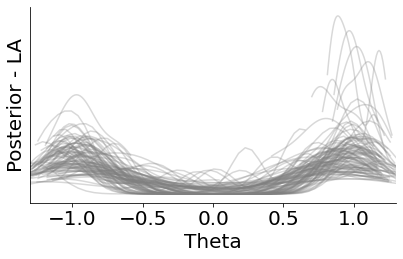

In [32]:
tmax=histories[0].max_t
fig,ax = plt.subplots()

kernel = pyabc.transition.GridSearchCV()

for i in range(iters):
    df,w = histories[i].get_distribution(m=0,t=histories[i].max_t)
    pyabc.visualization.plot_kde_1d(df, w, x='theta1',ax=ax, color='grey', kde = kernel, alpha=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.set_ylabel("Posterior - LA")
ax.set_xlabel("Theta")
ax.set_xlim(xmin=-1.3,xmax=1.3)


fig.tight_layout()
plt.savefig("/home/felipe/MTGraphics/UnbalancedModePPPN"+str(pop_size)+".pdf")

In [19]:
"""create statistics for a Histogram plot"""

t1_quantiles_10 = np.zeros(iters)
t1_medians = np.zeros(iters)
t1_quantiles_90 = np.zeros(iters)
t1_means = np.zeros(iters)
t1_stds = np.zeros(iters)


for i in range(iters):
    df,w= histories[i].get_distribution(m=0,t=histories[i].max_t)
    points = df['theta1'].values
    t1_quantiles_10[i]=pyabc.weighted_statistics.weighted_quantile(points, w, alpha=0.1)
    t1_medians[i]=pyabc.weighted_statistics.weighted_quantile(points, w, alpha=0.5)
    t1_quantiles_90[i]=pyabc.weighted_statistics.weighted_quantile(points, w, alpha=0.9)
    t1_means[i]=pyabc.weighted_statistics.weighted_mean(points,w)
    t1_stds[i]=pyabc.weighted_statistics.weighted_std(points,w)
    
    

allnames=[]
allnames.append("t1_means")
allnames.append("t1_quantiles_10")
allnames.append("t1_medians")
allnames.append("t1_quantiles_90")

alldata = []
for i in range(len(allnames)):
    alldata.append(eval(allnames[i]))



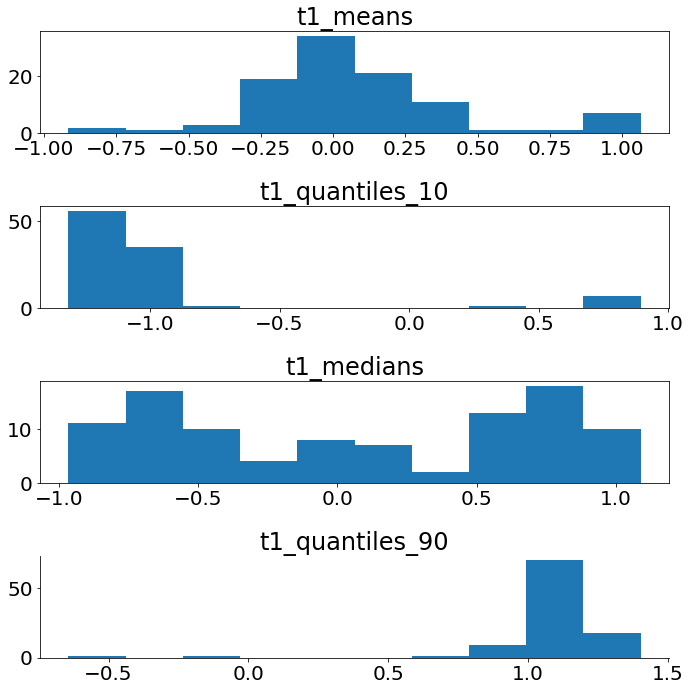

In [20]:
fig = plt.figure(figsize=(10,10))
nx, ny=len(allnames), 1

for i in range(nx*ny):
    ax = fig.add_subplot(nx,ny,i+1)
    ax.hist(alldata[i], bins = 10, range=(alldata[i].min(), alldata[i].max()))
    ax.set_title(allnames[i])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

fig.savefig("/home/felipe/MTGraphics/UnbalancedModeRes.pdf")

Same steps as above, now with DYN scheduling

In [8]:
redis_sampler = pyabc.sampler.RedisEvalParallelSampler(host="localhost", port=6379, look_ahead = False)

abc = pyabc.ABCSMC(models=model,
        parameter_priors=parameter_prior,
        distance_function=distance,
        population_size=pop_size,
        sampler=redis_sampler,
        eps=eps)

histories_ori=[]
runtimes=np.zeros(iters)
for i in range(iters):
    starttime=time.time()
    abc.new(db_path_ori, {"X_2": 1});
    endtime=time.time()
    h = abc.run(minimum_epsilon=min_eps, max_nr_populations=max_nr_pop)
    histories_ori.append(h)
    runtimes[i]=endtime-starttime

INFO:History:Start <ABCSMC id=1, start_time=2021-04-27 15:45:26.101967>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.5163557132458898.
INFO:ABC:Acceptance rate: 16 / 55 = 2.9091e-01, ESS=1.5453e+01.
INFO:ABC:t: 2, eps: 0.2033401462724468.
INFO:ABC:Acceptance rate: 16 / 146 = 1.0959e-01, ESS=1.4476e+01.
INFO:ABC:t: 3, eps: 0.10668376155075564.
INFO:ABC:Acceptance rate: 16 / 325 = 4.9231e-02, ESS=1.5624e+01.
INFO:ABC:t: 4, eps: 0.036395957094042745.
INFO:ABC:Acceptance rate: 16 / 642 = 2.4922e-02, ESS=1.5489e+01.
INFO:ABC:t: 5, eps: 0.009361054280495173.
INFO:ABC:Acceptance rate: 16 / 2068 = 7.7369e-03, ESS=1.3620e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=1, duration=0:00:47.129070, end_time=2021-04-27 15:46:13.231037>
INFO:History:Start <ABCSMC id=2, start_time=2021-04-27 15:46:13.248006>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t:

INFO:History:Done <ABCSMC id=9, duration=0:00:58.956807, end_time=2021-04-27 15:54:43.371653>
INFO:History:Start <ABCSMC id=10, start_time=2021-04-27 15:54:43.389067>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.6894921562966838.
INFO:ABC:Acceptance rate: 16 / 46 = 3.4783e-01, ESS=1.3756e+01.
INFO:ABC:t: 2, eps: 0.3170871896036042.
INFO:ABC:Acceptance rate: 16 / 98 = 1.6327e-01, ESS=1.4993e+01.
INFO:ABC:t: 3, eps: 0.08926245296020086.
INFO:ABC:Acceptance rate: 16 / 261 = 6.1303e-02, ESS=1.5857e+01.
INFO:ABC:t: 4, eps: 0.03969673371403617.
INFO:ABC:Acceptance rate: 16 / 669 = 2.3916e-02, ESS=1.5416e+01.
INFO:ABC:t: 5, eps: 0.021007213046759687.
INFO:ABC:Acceptance rate: 16 / 999 = 1.6016e-02, ESS=1.5450e+01.
INFO:ABC:t: 6, eps: 0.011081795202489716.
INFO:ABC:Acceptance rate: 16 / 1835 = 8.7193e-03, ESS=1.5864e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=10, duration=0:01:08.755355, end_time

INFO:ABC:Acceptance rate: 16 / 571 = 2.8021e-02, ESS=1.4093e+01.
INFO:ABC:t: 5, eps: 0.017323229859595477.
INFO:ABC:Acceptance rate: 16 / 1617 = 9.8949e-03, ESS=1.5953e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=18, duration=0:00:39.439210, end_time=2021-04-27 16:04:17.588458>
INFO:History:Start <ABCSMC id=19, start_time=2021-04-27 16:04:17.617372>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 22 = 7.2727e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.7955345836831107.
INFO:ABC:Acceptance rate: 16 / 41 = 3.9024e-01, ESS=1.5648e+01.
INFO:ABC:t: 2, eps: 0.35930973250333387.
INFO:ABC:Acceptance rate: 16 / 78 = 2.0513e-01, ESS=1.4884e+01.
INFO:ABC:t: 3, eps: 0.13643034520127104.
INFO:ABC:Acceptance rate: 16 / 110 = 1.4545e-01, ESS=1.5821e+01.
INFO:ABC:t: 4, eps: 0.05693814296710268.
INFO:ABC:Acceptance rate: 16 / 448 = 3.5714e-02, ESS=1.5591e+01.
INFO:ABC:t: 5, eps: 0.03075862209663482.
INFO:ABC:Acceptance rate: 16 / 863 = 1.8540e-02, ESS=1.5894e+01.


INFO:History:Start <ABCSMC id=28, start_time=2021-04-27 16:11:34.259535>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 22 = 7.2727e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.7405134817161871.
INFO:ABC:Acceptance rate: 16 / 34 = 4.7059e-01, ESS=1.5968e+01.
INFO:ABC:t: 2, eps: 0.32142439867577605.
INFO:ABC:Acceptance rate: 16 / 97 = 1.6495e-01, ESS=1.5918e+01.
INFO:ABC:t: 3, eps: 0.10205355651622672.
INFO:ABC:Acceptance rate: 16 / 200 = 8.0000e-02, ESS=1.5669e+01.
INFO:ABC:t: 4, eps: 0.032794262758106055.
INFO:ABC:Acceptance rate: 16 / 670 = 2.3881e-02, ESS=1.5691e+01.
INFO:ABC:t: 5, eps: 0.014648130824866788.
INFO:ABC:Acceptance rate: 16 / 2084 = 7.6775e-03, ESS=1.5219e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=28, duration=0:00:42.812617, end_time=2021-04-27 16:12:17.072152>
INFO:History:Start <ABCSMC id=29, start_time=2021-04-27 16:12:17.089707>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC

INFO:History:Start <ABCSMC id=37, start_time=2021-04-27 16:19:34.313643>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.6099277741269369.
INFO:ABC:Acceptance rate: 16 / 53 = 3.0189e-01, ESS=1.5840e+01.
INFO:ABC:t: 2, eps: 0.35951546142560586.
INFO:ABC:Acceptance rate: 16 / 81 = 1.9753e-01, ESS=1.5100e+01.
INFO:ABC:t: 3, eps: 0.23861251634141808.
INFO:ABC:Acceptance rate: 16 / 97 = 1.6495e-01, ESS=9.9673e+00.
INFO:ABC:t: 4, eps: 0.07450286297680567.
INFO:ABC:Acceptance rate: 16 / 318 = 5.0314e-02, ESS=1.5339e+01.
INFO:ABC:t: 5, eps: 0.029061774021420378.
INFO:ABC:Acceptance rate: 16 / 889 = 1.7998e-02, ESS=1.5356e+01.
INFO:ABC:t: 6, eps: 0.016158697911464646.
INFO:ABC:Acceptance rate: 16 / 706 = 2.2663e-02, ESS=1.5538e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=37, duration=0:00:31.754889, end_time=2021-04-27 16:20:06.068532>
INFO:History:Start <ABCSMC id=38, start_time=2021-04-27 16:20:06.0

INFO:History:Done <ABCSMC id=45, duration=0:00:28.380467, end_time=2021-04-27 16:27:06.104558>
INFO:History:Start <ABCSMC id=46, start_time=2021-04-27 16:27:06.130418>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.7364342207434775.
INFO:ABC:Acceptance rate: 16 / 34 = 4.7059e-01, ESS=1.5636e+01.
INFO:ABC:t: 2, eps: 0.3040005375515784.
INFO:ABC:Acceptance rate: 16 / 69 = 2.3188e-01, ESS=1.5176e+01.
INFO:ABC:t: 3, eps: 0.16348978593168428.
INFO:ABC:Acceptance rate: 16 / 184 = 8.6957e-02, ESS=1.3199e+01.
INFO:ABC:t: 4, eps: 0.06898678450701197.
INFO:ABC:Acceptance rate: 16 / 307 = 5.2117e-02, ESS=1.5540e+01.
INFO:ABC:t: 5, eps: 0.02281256952284696.
INFO:ABC:Acceptance rate: 16 / 1053 = 1.5195e-02, ESS=1.5679e+01.
INFO:ABC:t: 6, eps: 0.011354399996631548.
INFO:ABC:Acceptance rate: 16 / 2235 = 7.1588e-03, ESS=1.5683e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=46, duration=0:01:03.871283, end_tim

INFO:ABC:t: 6, eps: 0.015351744834966617.
INFO:ABC:Acceptance rate: 16 / 1362 = 1.1747e-02, ESS=1.5958e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=54, duration=0:00:43.165287, end_time=2021-04-27 16:35:33.471983>
INFO:History:Start <ABCSMC id=55, start_time=2021-04-27 16:35:33.490051>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 22 = 7.2727e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.593924693224979.
INFO:ABC:Acceptance rate: 16 / 50 = 3.2000e-01, ESS=1.5770e+01.
INFO:ABC:t: 2, eps: 0.1776497337791694.
INFO:ABC:Acceptance rate: 16 / 155 = 1.0323e-01, ESS=1.4733e+01.
INFO:ABC:t: 3, eps: 0.053776668514701455.
INFO:ABC:Acceptance rate: 16 / 331 = 4.8338e-02, ESS=1.5711e+01.
INFO:ABC:t: 4, eps: 0.026741933412455437.
INFO:ABC:Acceptance rate: 16 / 754 = 2.1220e-02, ESS=1.5163e+01.
INFO:ABC:t: 5, eps: 0.01131449100950521.
INFO:ABC:Acceptance rate: 16 / 2471 = 6.4751e-03, ESS=1.5890e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <A

INFO:ABC:t: 6, eps: 0.013761105717206056.
INFO:ABC:Acceptance rate: 16 / 1890 = 8.4656e-03, ESS=1.4339e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=63, duration=0:01:06.218764, end_time=2021-04-27 16:43:53.193415>
INFO:History:Start <ABCSMC id=64, start_time=2021-04-27 16:43:53.217234>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.8237845383113115.
INFO:ABC:Acceptance rate: 16 / 38 = 4.2105e-01, ESS=1.5887e+01.
INFO:ABC:t: 2, eps: 0.25324526793620994.
INFO:ABC:Acceptance rate: 16 / 89 = 1.7978e-01, ESS=1.5254e+01.
INFO:ABC:t: 3, eps: 0.13525417797364186.
INFO:ABC:Acceptance rate: 16 / 193 = 8.2902e-02, ESS=1.5632e+01.
INFO:ABC:t: 4, eps: 0.06698970747434066.
INFO:ABC:Acceptance rate: 16 / 402 = 3.9801e-02, ESS=1.1892e+01.
INFO:ABC:t: 5, eps: 0.023217856144284295.
INFO:ABC:Acceptance rate: 16 / 692 = 2.3121e-02, ESS=1.5087e+01.
INFO:ABC:t: 6, eps: 0.009767077663402679.
INFO:ABC:Acceptance ra

INFO:ABC:t: 1, eps: 0.6068361868899418.
INFO:ABC:Acceptance rate: 16 / 45 = 3.5556e-01, ESS=1.5391e+01.
INFO:ABC:t: 2, eps: 0.2690058688205763.
INFO:ABC:Acceptance rate: 16 / 69 = 2.3188e-01, ESS=1.4722e+01.
INFO:ABC:t: 3, eps: 0.12790394662143678.
INFO:ABC:Acceptance rate: 16 / 129 = 1.2403e-01, ESS=1.3514e+01.
INFO:ABC:t: 4, eps: 0.06749754676198975.
INFO:ABC:Acceptance rate: 16 / 542 = 2.9520e-02, ESS=1.4787e+01.
INFO:ABC:t: 5, eps: 0.03623660802844109.
INFO:ABC:Acceptance rate: 16 / 515 = 3.1068e-02, ESS=1.5837e+01.
INFO:ABC:t: 6, eps: 0.012877596025611835.
INFO:ABC:Acceptance rate: 16 / 1300 = 1.2308e-02, ESS=1.0861e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=72, duration=0:00:30.003296, end_time=2021-04-27 16:53:31.895021>
INFO:History:Start <ABCSMC id=73, start_time=2021-04-27 16:53:31.913258>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 1.062744453041447.
INFO:ABC:Acceptance rate: 1

INFO:ABC:t: 4, eps: 0.13012904633977646.
INFO:ABC:Acceptance rate: 16 / 176 = 9.0909e-02, ESS=1.4432e+01.
INFO:ABC:t: 5, eps: 0.07971758817525836.
INFO:ABC:Acceptance rate: 16 / 239 = 6.6946e-02, ESS=1.5699e+01.
INFO:ABC:t: 6, eps: 0.03494285325803005.
INFO:ABC:Acceptance rate: 16 / 622 = 2.5723e-02, ESS=1.5004e+01.
INFO:ABC:t: 7, eps: 0.017114509832694337.
INFO:ABC:Acceptance rate: 16 / 2160 = 7.4074e-03, ESS=1.5905e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=80, duration=0:01:01.722508, end_time=2021-04-27 17:01:28.883806>
INFO:History:Start <ABCSMC id=81, start_time=2021-04-27 17:01:28.910434>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.5036209760871728.
INFO:ABC:Acceptance rate: 16 / 50 = 3.2000e-01, ESS=1.5802e+01.
INFO:ABC:t: 2, eps: 0.22144337999014133.
INFO:ABC:Acceptance rate: 16 / 91 = 1.7582e-01, ESS=1.5740e+01.
INFO:ABC:t: 3, eps: 0.05568525909068145.
INFO:ABC:Acceptance rate

INFO:ABC:t: 2, eps: 0.2923560452322272.
INFO:ABC:Acceptance rate: 16 / 94 = 1.7021e-01, ESS=1.1951e+01.
INFO:ABC:t: 3, eps: 0.13912847643802978.
INFO:ABC:Acceptance rate: 16 / 159 = 1.0063e-01, ESS=1.5874e+01.
INFO:ABC:t: 4, eps: 0.06885939822144216.
INFO:ABC:Acceptance rate: 16 / 445 = 3.5955e-02, ESS=1.5666e+01.
INFO:ABC:t: 5, eps: 0.023530777633376722.
INFO:ABC:Acceptance rate: 16 / 752 = 2.1277e-02, ESS=1.5401e+01.
INFO:ABC:t: 6, eps: 0.00726210800048042.
INFO:ABC:Acceptance rate: 16 / 3974 = 4.0262e-03, ESS=1.4390e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=89, duration=0:01:40.405883, end_time=2021-04-27 17:10:31.387883>
INFO:History:Start <ABCSMC id=90, start_time=2021-04-27 17:10:31.406995>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 22 = 7.2727e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.9991146072536452.
INFO:ABC:Acceptance rate: 16 / 32 = 5.0000e-01, ESS=1.5632e+01.
INFO:ABC:t: 2, eps: 0.6242028682233459.
INFO:ABC:Acceptance rate: 

INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.9565e-01, ESS=1.6000e+01.
INFO:ABC:t: 1, eps: 0.46102187505172043.
INFO:ABC:Acceptance rate: 16 / 73 = 2.1918e-01, ESS=1.5938e+01.
INFO:ABC:t: 2, eps: 0.2558945692474286.
INFO:ABC:Acceptance rate: 16 / 73 = 2.1918e-01, ESS=1.5839e+01.
INFO:ABC:t: 3, eps: 0.11874883565961657.
INFO:ABC:Acceptance rate: 16 / 189 = 8.4656e-02, ESS=1.6330e+00.
INFO:ABC:t: 4, eps: 0.045024640409032604.
INFO:ABC:Acceptance rate: 16 / 589 = 2.7165e-02, ESS=1.4086e+01.
INFO:ABC:t: 5, eps: 0.029051606611509472.
INFO:ABC:Acceptance rate: 16 / 573 = 2.7923e-02, ESS=1.1814e+01.
INFO:ABC:t: 6, eps: 0.011142807706806734.
INFO:ABC:Acceptance rate: 16 / 2096 = 7.6336e-03, ESS=1.4750e+01.
INFO:pyabc.util:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC id=98, duration=0:01:11.148496, end_time=2021-04-27 17:19:02.398008>
INFO:History:Start <ABCSMC id=99, start_time=2021-04-27 17:19:02.519469>
INFO:ABC:t: 0, eps: 500.
INFO:ABC:Acceptance rate: 16 / 23 = 6.

INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 1.0}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}
INFO:root:Best params: {'scaling': 0.05}
INFO:root:Best params: {'scaling': 0.2875}

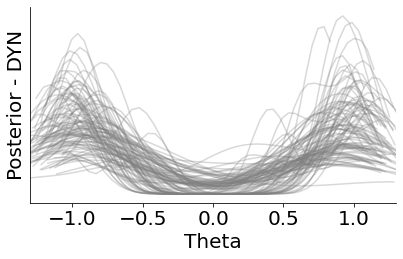

In [31]:
tmax=histories_ori[0].max_t
fig,ax = plt.subplots()

kernel = pyabc.transition.GridSearchCV()

for i in range(iters):
    df,w = histories_ori[i].get_distribution(m=0,t=histories_ori[i].max_t)
    pyabc.visualization.plot_kde_1d(df, w, x='theta1',ax=ax, color='grey', kde = kernel, alpha=0.3)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.set_ylabel("Posterior - DYN")
ax.set_xlabel("Theta")
ax.set_xlim(xmin=-1.3,xmax=1.3)
fig.tight_layout()
plt.savefig("/home/felipe/MTGraphics/UnbalancedModeOriN"+str(pop_size)+".pdf")

In [21]:
t1_quantiles_10 = np.zeros(iters)
t1_medians = np.zeros(iters)
t1_quantiles_90 = np.zeros(iters)
t1_means = np.zeros(iters)
t1_stds = np.zeros(iters)


for i in range(iters):
    df,w= histories_ori[i].get_distribution(m=0,t=histories_ori[i].max_t)
    points = df['theta1'].values
    t1_quantiles_10[i]=pyabc.weighted_statistics.weighted_quantile(points, w, alpha=0.1)
    t1_medians[i]=pyabc.weighted_statistics.weighted_quantile(points, w, alpha=0.5)
    t1_quantiles_90[i]=pyabc.weighted_statistics.weighted_quantile(points, w, alpha=0.9)
    t1_means[i]=pyabc.weighted_statistics.weighted_mean(points,w)
    t1_stds[i]=pyabc.weighted_statistics.weighted_std(points,w)
    
    

allnames_ori=[]
allnames_ori.append("t1_means")
allnames_ori.append("t1_quantiles_10")
allnames_ori.append("t1_medians")
allnames_ori.append("t1_quantiles_90")

alldata_ori = []
for i in range(len(allnames_ori)):
    alldata_ori.append(eval(allnames_ori[i]))



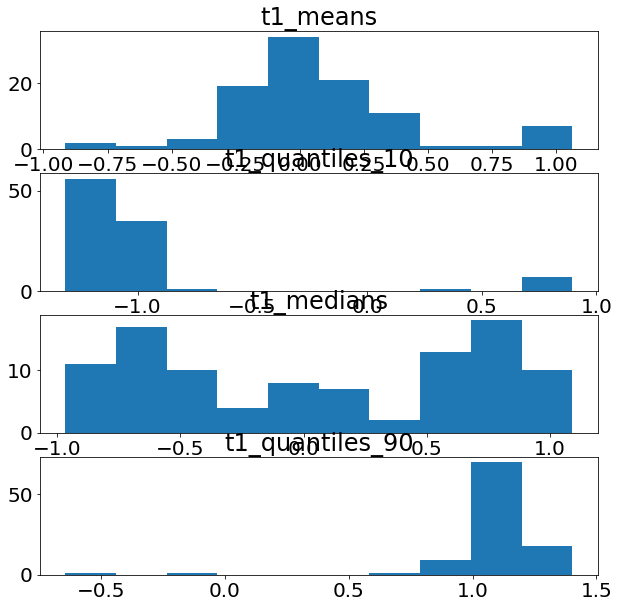

In [22]:
fig = plt.figure(figsize=(10,10))
nx, ny=len(allnames), 1

for i in range(nx*ny):
    ax = fig.add_subplot(nx,ny,i+1)
    ax.hist(alldata[i], bins = 10, range=(alldata[i].min(), alldata[i].max()))
    ax.set_title(allnames[i])
    


Comparision of the two results, returns Figure 15

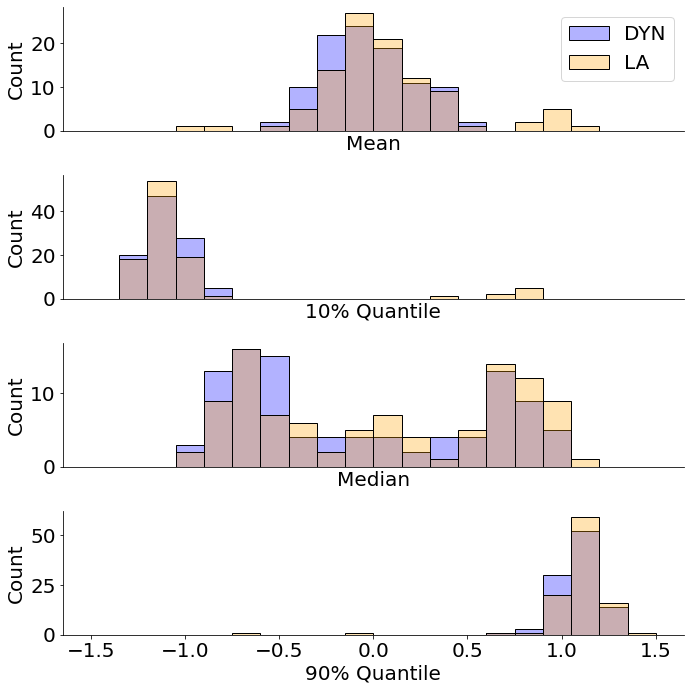

In [29]:
import seaborn as sns

fig,axes = plt.subplots(len(allnames),1,figsize=(10,10))
nx, ny=len(allnames), 1

for i in range(nx*ny):
    ax = axes[i]
    ax.set_title(None)
    bins=20
    binrange_min=min(alldata[i].min(),alldata_ori[i].min())
    binrange_max=max(alldata[i].max(),alldata_ori[i].max())
    
    binrange_min=-1.5
    binrange_max=1.5
    sns.histplot(alldata_ori[i], ax = ax, bins = bins,
                 binrange = (binrange_min, binrange_max), common_bins = True,
                 kde=False, label="DYN", color = "blue", alpha = 0.3)
    sns.histplot(alldata[i], ax = ax, bins = bins,
                 binrange = (binrange_min, binrange_max), common_bins = True,
                 kde=False, label="LA", color = "orange", alpha = 0.3)

    if allnames[i] == "effective_sample_size":
        ax.axvline(x = alldata[i].mean(), label="means", color="blue", linestyle="dashed")
        ax.axvline(x = alldata_ori[i].mean(),color="orange", linestyle="dashed")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if i == 0:
        ax.legend()
        
axes[0].set_xlabel("Mean")
axes[1].set_xlabel("10% Quantile")
axes[2].set_xlabel("Median")
axes[3].set_xlabel("90% Quantile")

axes[0].set_xticks([])
axes[1].set_xticks([])
axes[2].set_xticks([])
#axes[0].set_xlabel("Standard deviation")
fig.tight_layout()

fig.savefig("/home/felipe/MTGraphics/UnbalancedModesCompN"+str(pop_size)+".pdf")